### L1 (Lasso) and L2 (Ridge) Regularization - Bayes Ehtimalı baxımından izahı”

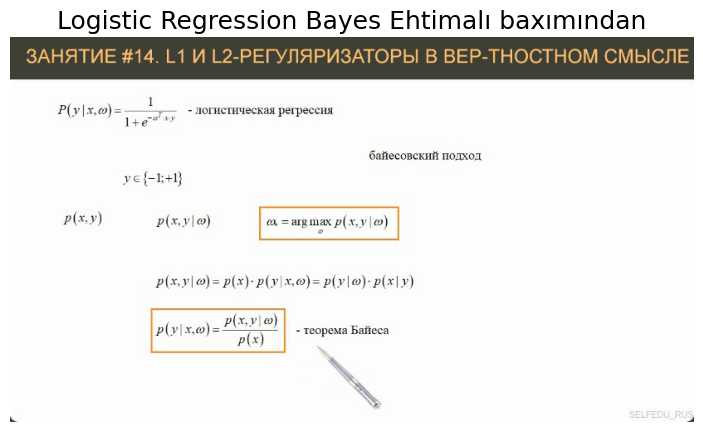

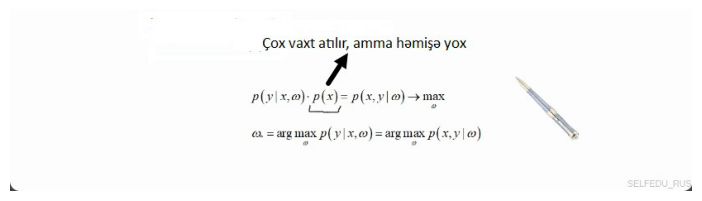

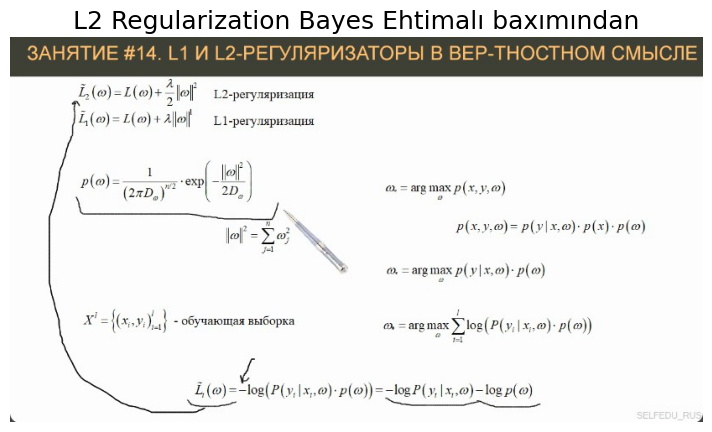

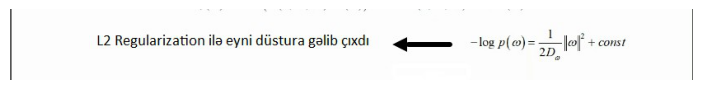

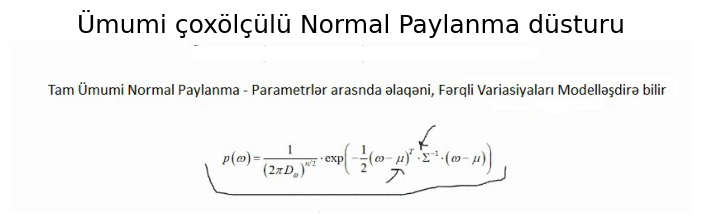

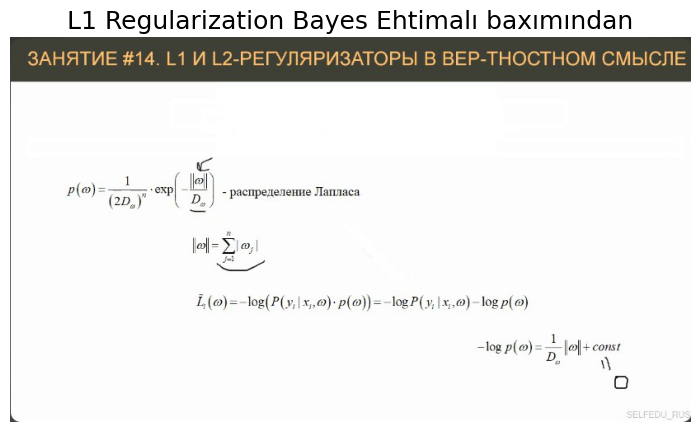

In [14]:
from PIL import Image

# Fayl yolunun əsas hissəsi
base_path = r'C:\Users\dell\Desktop\Selfedu\Pictures\ML_14_'

# Şəkilləri saxlayacağımız siyahı
image_list = []

# 1-dən 5-ə qədər olan şəkilləri dövr ilə açırıq
for i in range(1, 7):  # 1-dən 5-ə qədər
    full_path = f'{base_path}{i}.jpg'  # Fayl yolunu dinamik olaraq yaradırıq
    img = Image.open(full_path)
    image_list.append(img)  # Şəkili siyahıya əlavə edirik

# Nəticə: images siyahısında bütün yüklənmiş şəkillər olacaq

import matplotlib.pyplot as plt

# Şəkilləri göstərin
for i, image in enumerate(image_list):
    if i == 1:
        plt.figure(figsize=(8.8, 4))
    elif i == 3:
        plt.figure(figsize=(8.8, 4))
    elif i == 4:
        plt.figure(figsize=(8.8, 4))          
    else:     
        plt.figure(figsize=(25, 5))  # Şəkilin ölçüsü    
        
    if i < 1:
        plt.title("""Logistic Regression Bayes Ehtimalı baxımından""", size='18')
    elif i < 2:
        plt.title("""""", size='18')
    elif i < 3:
        plt.title("""L2 Regularization Bayes Ehtimalı baxımından""", size='18')
    elif i < 4:
        plt.title("""""", size='18')
    elif i < 5:
        plt.title("""Ümumi çoxölçülü Normal Paylanma düsturu""", size='18')
    elif i < 6:
        plt.title("""L1 Regularization Bayes Ehtimalı baxımından""", size='18')         
            
    
    plt.imshow(image)
    plt.axis('off')  # Oxları gizlətmək üçün
    plt.show()

### L2-Regularizasiya və Bayesian/MLE Baxışı: Addım-addım İzah ✅

#### **L2-regularizasiya və Bayesian/MLE baxışı ilə parametr optimizasiyası:**


#### **1️⃣ L2-regularizasiya funksiyası**

$$
\tilde{L}_2(\omega) = L(\omega) + \frac{\lambda}{2} |\omega|^2
$$

**İzah:**

* $L(\omega)$ — orijinal loss funksiyası (məsələn, log-loss, MSE və s.)
* $\frac{\lambda}{2} |\omega|^2$ — L2 cəriməsi (regularizasiya)

  * $\lambda > 0$ — regularizasiya gücünü təyin edir.
  * $|\omega|^2 = \sum_{j=1}^n \omega_j^2$ — bütün parametrlərin kvadratlarının cəmi.
* Məqsəd: modelin **çox öyrənməsinin (overfitting) qarşısını almaq** və parametrləri çox böyük olmamasını təmin etmək.

---

#### **2️⃣ Prior paylanması (Bayesian baxışı)**

$$
p(\omega) = \frac{1}{(2 \pi D_\omega)^{n/2}} \cdot \exp\left(-\frac{|\omega|^2}{2 D_\omega}\right)
$$

**İzah:**

* Bu $\omega$ parametrlərinin **normal paylanması**dır:

  * Ortalama $0$
  * Varians $D_\omega$
* $|\omega|^2 = \sum_{j=1}^n \omega_j^2$
* Məqsəd: **prior məlumat** əlavə etmək; böyük parametrləri ehtimal azaldır (regularizasiya ilə eyni nəticə).

---

#### **3️⃣ Parametr optimizasiyası (MAP)**

$$
\omega_* = \arg\max_\omega p(x, y, \omega)
$$

**İzah:**

* Məqsəd: **parametrləri maksimum ehtimalla tapmaq**.
* $p(x, y, \omega)$ — məlumat və parametrlərin birlikdə ehtimalı.
* Bayesian baxış: prior $p(\omega)$ və likelihood $p(y|x,\omega)$ birləşdirilir.

---

#### **4️⃣ Ehtimalın parçalanması**

$$
p(x, y, \omega) = p(y|x, \omega) \cdot p(x) \cdot p(\omega)
$$

* $p(y|x, \omega)$ — likelihood (müşahidələrə əsaslanan ehtimal)
* $p(x)$ — verilənlərin paylanması (çox vaxt nəzərə alınmır, çünki parametrə bağlı deyil)
* $p(\omega)$ — prior (yuxarıda izah etdiyimiz L2-regularizasiya ilə eyni ideya)

---

#### **5️⃣ Likelihood + prior (MAP)**

$$
\omega_* = \arg\max_\omega p(y|x, \omega) \cdot p(\omega)
$$

* **Maximum a posteriori (MAP) estimasiya**:

  * Modelin likelihood-i ilə prior-i birləşdirərək parametrləri tapırıq.
  * Prior = regularizasiya, likelihood = modelin uyğunluğu.

---

#### **6️⃣ Log-likelihood toplamaq**

$$
\omega_* = \arg\max_\omega \sum_{i=1}^{l} \log(p(y_i | x_i, \omega) \cdot p(\omega))
$$

* Daha riyazi cəhətdən rahatdır:

  * Çox kiçik ehtimalların vurulması yerinə **log** götürürük.
  * Summasiya formasında daha asan optimizasiya aparılır.

---

#### **7️⃣ Negative log-likelihood + prior**

$$
\tilde{L}(\omega) = -\log(p(y|x, \omega) \cdot p(\omega)) = -\log p(y|x,\omega) - \underline{\log p(\omega)}
$$

* MAP optimizasiyasını **minimizasiya probleminə çevirir**:

  * Loss funksiyası = neg-log-likelihood + regularizasiya

  * $-\log p(y|x,\omega)$ → likelihood (modelin uyğunluğu)
  * $-\log p(\omega)$ → prior (regularizasiya)
  * Əslində bu **L2-regularizasiya ilə eynidir**:
    $-\log p(\omega) \sim \frac{\lambda}{2} |\omega|^2$ 
    
#### **İzah edək:** 

#### **Neg-log prior**

MAP loss-də bizə lazım olan hissə: $-\log p(\omega)$. Gəlin götürək:

$$
-\log p(\omega) = - \log \frac{1}{(2 \pi D_\omega)^{n/2}} - \log \exp\Big(-\frac{|\omega|^2}{2 D_\omega}\Big)
$$

İndi sadələşdirək:

1. $-\log \frac{1}{(2 \pi D_\omega)^{n/2}} = \frac{n}{2} \log(2 \pi D_\omega)$ → bu **sabitdir**, optimizasiya zamanı $\omega$-dən asılı deyil, ona görə **ən çox L2-regularizasiya üçün nəzərə alınmır**.
> Qeyd: Sabit faktor ($\frac{n}{2} \log(2\pi D_\omega)$) optimizasiya zamanı nəzərə alınmır, çünki $\omega$-ni dəyişdirmir.
2. $-\log \exp(-|\omega|^2/(2 D_\omega)) = \frac{|\omega|^2}{2 D_\omega}$ → bu hissə **L2 cəriməsi ilə eynidir**.



#### **Nəticə**

MAP loss funksiyasında yalnız $\omega$-dən asılı hissəni götürürük:

$$
-\log p(\omega) \sim \frac{1}{2 D_\omega} |\omega|^2
$$

> **Yəni, L2-regularizasiya cəriməsidir.**

$$
\frac{1}{2 D_\omega} |\omega|^2
$$

> **L2-regularizasiya ilə eyni**:
$$
-\log p(\omega) \sim \frac{\lambda}{2} |\omega|^2
$$


#### ✅ **Xülasə**

* **Tam $p(\omega)$ içində həm $\exp$ hissəsi, həm sabit $(2 \pi D_\omega)^{n/2}$ var.**
* **Neg-log götürəndə, sabit hissə optimizasiyaya təsir etmir → **sadəcə $(1/2D_\omega) |\omega|^2$** qalır.**
* **Bu, **L2-regularizasiya** ilə tam eynidir.**
* **Loss funksiyası + L2 regularizasiya** = **MAP estimation**
* **Likelihood (log-loss)** + **Prior (L2)** = optimallaşdırılan funksiya
* Məqsəd: həm **modelin doğruluğunu**, həm də **overfitting-i** balanslamaq.


### L1-regularizasiya və Bayesian/MLE baxışı

#### **L1-regularizasiya və Bayesian/MLE baxışı ilə parametr optimizasiyası**

#### **1️⃣ L1-regularizasiya funksiyası**

$$
\tilde{L}_1(\omega) = L(\omega) + \lambda |\omega|^1
$$

**İzah:**

* $L(\omega)$ — orijinal loss funksiyası (log-loss, MSE və s.)
* $\lambda |\omega|^1$ — **L1 cəriməsi**

  * $\lambda > 0$ — regularizasiya gücü
  * $\|\omega\|^1 = \sum_{j=1}^n |\omega_j|$ — parametrlərin **modullarının cəmi**
* Məqsəd:

  * **overfitting-in qarşısını almaq**
  * **parametrləri sıfıra sıxışdırmaq (sparsity)**

> 🔑 L1-in əsas fərqi: **bəzı $\omega_j$-ləri tam 0 edir** → feature selection.

---

#### **2️⃣ Prior paylanması (Bayesian baxışı)**

L1-regularizasiya **Gaussian deyil**, **Laplace prior** ilə uyğun gəlir:

$$
p(\omega) = \prod_{j=1}^n \frac{1}{2D_\omega} \exp\left(-\frac{|\omega_j|}{D_\omega}\right)
$$

və ya vektor formasında:

$$
p(\omega) = \frac{1}{(2D_\omega)^n} \exp\left(-\frac{|\omega|^1}{D_\omega}\right)
$$

**İzah:**

* Bu **Laplace (double exponential) paylanmasıdır**
* Ortalama: $0$
* Ölçü (scale): $b$
* $\|\omega\|^1 = \sum_{j=1}^n |\omega_j|$

> Laplace prior **0 ətrafında çox iti pik** yaradır → parametrlər 0-a “itələnir”.

---

#### **3️⃣ Parametr optimizasiyası (MAP)**

$$
\omega_* = \arg\max_\omega p(x, y, \omega)
$$

**İzah:**

* Məqsəd: parametrləri maksimum posterior ehtimalla tapmaq
* Bayesian baxış: likelihood + prior

---

#### **4️⃣ Ehtimalın parçalanması**

$$
p(x, y, \omega) = p(y|x, \omega) \cdot p(x) \cdot p(\omega)
$$

* $p(y|x,\omega)$ — likelihood
* $p(x)$ — $\omega$-dən asılı deyil → nəzərə alınmır
* $p(\omega)$ — Laplace prior (L1 regularizasiya)

---

#### **5️⃣ Likelihood + prior (MAP)**

$$
\omega_* = \arg\max_\omega p(y|x, \omega) \cdot p(\omega)
$$

* MAP = likelihood + prior
* Prior burada **L1 cəriməsi** rolunu oynayır

---

#### **6️⃣ Log-likelihood toplamaq**

$$
\omega_* = \arg\max_\omega \sum_{i=1}^{l} \log\big(p(y_i | x_i, \omega) \cdot p(\omega)\big)
$$

* Log götürülür → optimizasiya rahatlaşır

---

#### **7️⃣ Negative log-likelihood + prior**

$$
\tilde{L}(\omega)
= -\log(p(y|x, \omega) \cdot p(\omega))
= -\log p(y|x,\omega) - \underline{\log p(\omega)}
$$

* MAP → minimizasiya problemi
* İndi əsas hissə: **neg-log prior**

---

#### **İzah edək: Neg-log prior (L1)**

Laplace prior:

$$
p(\omega) = \frac{1}{(2D_\omega)^n} \exp\left(-\frac{|\omega|^1}{D_\omega}\right)
$$

Neg-log götürək:

$$
-\log p(\omega)
= -\log \frac{1}{(2D_\omega)^n} - \log \exp\left(-\frac{|\omega|^1}{D_\omega}\right)
  $$

Sadələşdirək:

1️⃣ Sabit hissə:

$$
-\log \frac{1}{(2D_\omega)^n}
= n \log(2D_\omega)
$$

2️⃣ Əsas hissə:

$$
-\log \exp\left(-\frac{|\omega|^1}{D_\omega}\right)
= \frac{|\omega|^1}{D_\omega}
$$

---

### **Nəticə**

$$
-\log p(\omega) \sim \frac{1}{D_\omega} |\omega|^1
$$

və bu **L1-regularizasiya**dır:

$$
\lambda |\omega|^1
$$

burada:

$$
\lambda = \frac{1}{D_\omega}
$$

---

#### ✅ **Xülasə (L1 üçün)**

* **L1 regularizasiya = Laplace prior**
* **Neg-log prior → $|\omega|^1$**
* **Sabit hissələr optimizasiyaya təsir etmir**
* **Loss + L1** = **MAP estimation**
* **Əsas fərq:**

  * L2 → çəkiləri kiçildir
  * **L1 → çəkiləri sıfırlayır (feature selection)**



### İki Gaussian Prior Arasındakı Əsas Fərqlər: Ümumi vs İzotropik Normal Paylanma

- #### Maşın öyrənmədə prior seçimi və regularizasiya təsirləri



#### **DÜSTUR 1**

$$
p(\omega) = \frac{1}{(2\pi D_\omega)^{n/2}} \cdot \exp\left(-\frac{1}{2}(\omega-\mu)^T \Sigma^{-1}(\omega-\mu)\right)
$$

**Bu nədir?**  
Bu **ümumi çoxölçülü normal paylanma** düsturudur.

**Komponentlər:**
- $\omega$: \(n\) ölçülü parametr vektoru.
- $\mu$: Orta qiymət vektoru (parametrlərin gözlənilən dəyəri).
- $\Sigma$: Kovariasiya matrisi ($n \times n$), parametrlər arasındakı əlaqəni və hər birinin dəyişkənliyini təsvir edir.
- $\Sigma^{-1}$: Kovariasiya matrisinin tərsi (dəqiqliy matrisi).
- $D_\omega$: Şəkildə qeyd olunub, lakin standart formada məxrəcdə $\det(\Sigma)^{1/2}$ olmalı idi. Burada $D_\omega$ ehtimal ki, $\Sigma$ ilə əlaqəli bir miqyas parametridir, amma qeyri-standart yazılıb.

#### **Həndəsi məna:**  
> **Bu paylanma **ellipsoid formalı** sıxlıq verir. $\mu$ mərkəzdir, $\Sigma$ isə ellipsoidin istiqamətini və uzunluqlarını təyin edir.**

**Məsələn:**
- Əgər $\Sigma$ diaqonaldırsa, parametrlər bir-birindən asılı deyil.
- Əgər $\Sigma$-də qeyri-diaqonal elementlər varsa, parametrlər korrelyasiya olunub.

---

#### **DÜSTUR 2**

$$
p(\omega) = \frac{1}{(2\pi D_\omega)^{n/2}} \cdot \exp\left(-\frac{\|\omega\|^2}{2 D_\omega}\right)
$$

**Bu nədir?**  
Bu **xüsusi halda çoxölçülü normal paylanma** (izotropik / sferik normal).

**Komponentlər:**
- $\omega$: $n$ ölçülü parametr vektoru.
- $\|\omega\|^2 = \omega_1^2 + \omega_2^2 + \dots + \omega_n^2$ (L2 normasının kvadratı).
- $D_\omega$: Skaler variasiya parametri (bütün istiqamətlərdə eyni yayılma).
- $\mu = 0$: Orta qiymət vektoru sıfırdır.

#### **Həndəsi məna:**  
> **Bu paylanma **sferik simmetrik**dir. Bütün istiqamətlərdə eyni yayılma var, parametrlər bir-birindən müstəqil və eyni variasiyaya malikdir.**

---

#### **ƏSAS FƏRQLƏR:**

| Xüsusiyyət | Düstur 1 (ümumi) | Düstur 2 (xüsusi) |
|------------|-------------------|-------------------|
| **Orta qiymət** | $\mu$ (istənilən vektor) | $\mu = 0$ |
| **Kovariasiya** | $\Sigma$ (tam matris) | $\Sigma = D_\omega \cdot I$ (skaler×identik) |
| **Parametr asılılığı** | Ola bilər (korrelyasiya var) | Yox (müstəqil) |
| **Forma** | Ellipsoid | Küre (sferik) |
| **Mürəkkəblik** | Daha çox parametr ($n + n(n+1)/2$) | Sadə (1 parametr: $D_\omega$) |
| **Regularizasiya təsiri** | Ümumi L2 deyil, "elliptik" cəza | Standart L2 (weight decay) |

---

#### **NİYƏ İKİNCİSİ DAHA ÇOX İŞLƏDİLİR?**

1. **Sadəlik:** Tək bir $D_\omega$ parametri ilə idarə olunur.
2. **Hesablama asanlığı:**$\|\omega\|^2$ hesablamaq çox asandır.
3. **Deep learning-də:** Çox vaxt "weight decay" kimi tanınan **L2 regularizasiyası** məhz bu paylanmaya uyğundur:  
   $$
   -\log p(\omega) \propto \frac{1}{2D_\omega} \|\omega\|^2
   $$
4. **İlkin fikir:** "Bütün ağırlıqlar sıfır ətrafında kiçik dəyərlərdə olmalıdır" – bu, overfitting qarşısını almaq üçün effektiv bir prior hesab olunur.

---
#### **Əsas fərqlər (XÜSUSİ VURĞULANAN):**

#### **1. ORTA QİYMƏT (Mean):**
- **Düstur 1:** $\mu$ ixtiyari vektor ola bilər. Parametrlər $\mu$ ətrafında paylanır.
- **Düstur 2:** $\mu = 0$ (sıfır vektor). Parametrlər mütləq sıfır ətrafında paylanır.

#### **2. KOVARİASİYA STRUKTURU:**
- **Düstur 1:** $\Sigma$ tam matrisdir. Parametrlər arasında **korrelyasiya ola bilər** və hər parametrin **fərqli variasiyası** ola bilər.
- **Düstur 2:** $\Sigma = D_\omega \cdot I$ (identik matrisin skaler qatı). **Korrelyasiya yoxdur**, bütün parametrlər eyni variasiyaya malikdir.

#### **3. HƏNDƏSİ FORMA:**
- **Düstur 1:** **Ellipsoid** - istiqamətlər üzrə uzanmalar fərqlidir.
- **Düstur 2:** **Kürə (sphere)** - bütün istiqamətlərdə eyni məsafədə.

#### **4. PARAMETR SAYI:**
- **Düstur 1:** Çox parametr: $n$ (ortalama) + $n(n+1)/2$ (kovariasiya) → böyük modellərdə çox böyük.
- **Düstur 2:** Cəmi 1 parametr: $D_\omega$.

#### **5. MAŞIN ÖYRƏNMƏDƏ ROLU:**
- **Düstur 1:** Ümumi prior - nadir hallarda istifadə olunur, çünki kovariasiya matrisini təyin etmək və qiymətləndirmək çətindir.
- **Düstur 2:** **Weight decay (L2 regularizasiya) buna uyğundur**. Deep learning-də ən çox istifadə olunan prior budur.

#### **6. REGULARİZASİYA TƏSİRİ:**
- **Düstur 1:** "İstiqamətli" cəza: bəzi parametrləri daha çox, bəzilərini daha az cəzalandıra bilər.
- **Düstur 2:** **Bərabər cəza**: bütün parametrlər eyni şəkildə kiçik dəyərlərə çəkilir.

---

#### **NİYƏ DÜSTUR 2 DAHA POPULARDIR?**

1. **Hesablama asanlığı:** $\|\omega\|^2$ hesablamaq matris tərsinə nisbətən çox sadədir.
2. **Hyperparametr azlığı:** Sadəcə $D_\omega$ (və ya $\lambda = 1/D_\omega$) seçmək kifayətdir.
3. **Effektiv regularizasiya:** Praktikada weight decay kimi tanınır və overfitting qarşısını effektiv şəkildə alır.
4. **İlkin fikir sadədir:** "Bütün parametrlər sıfıra yaxın olmalıdır" - bu, modelin mürəkkəbliyini məhdudlaşdırır.

---

#### **XÜLASƏ:**

- **Düstur 1:** Tam ümumi normal paylanma, parametrlərin arasındakı əlaqəni və fərqli variasiyaları modelləşdirə bilir.
- **Düstur 2:** Xüsusi hal: orta sıfır, bütün istiqamətlərdə eyni variasiya, parametrlər müstəqil → **standart L2 regularizasiyasına uyğundur**.

Deep learning-də əksər hallarda Düstur 2 istifadə olunur, çünki həm sadədir, həm də effektiv regularizasiya təmin edir. Düstur 1 daha çox statistik modellərdə və ya qeyri-izotropik prior lazım olduqda istifadə olunur.

#### **XÜLASƏ:**

- **Düstur 1:** **Ümumi Gaussian prior** - tam çevik, lakin mürəkkəb, nadir hallarda istifadə olunur.
- **Düstur 2:** **İzotropik Gaussian prior** (orta=0, eyni variasiya) - sadə, hesablama cəhətdən səmərəli, deep learning-də **standart weight decay** kimi işləyir.

**Əsas fərq:** Düstur 2, Düstur 1-in xüsusi və sadələşdirilmiş halıdır və praktikada ən çox bu forma istifadə olunur.

### Qrafik Baxımndan İzah

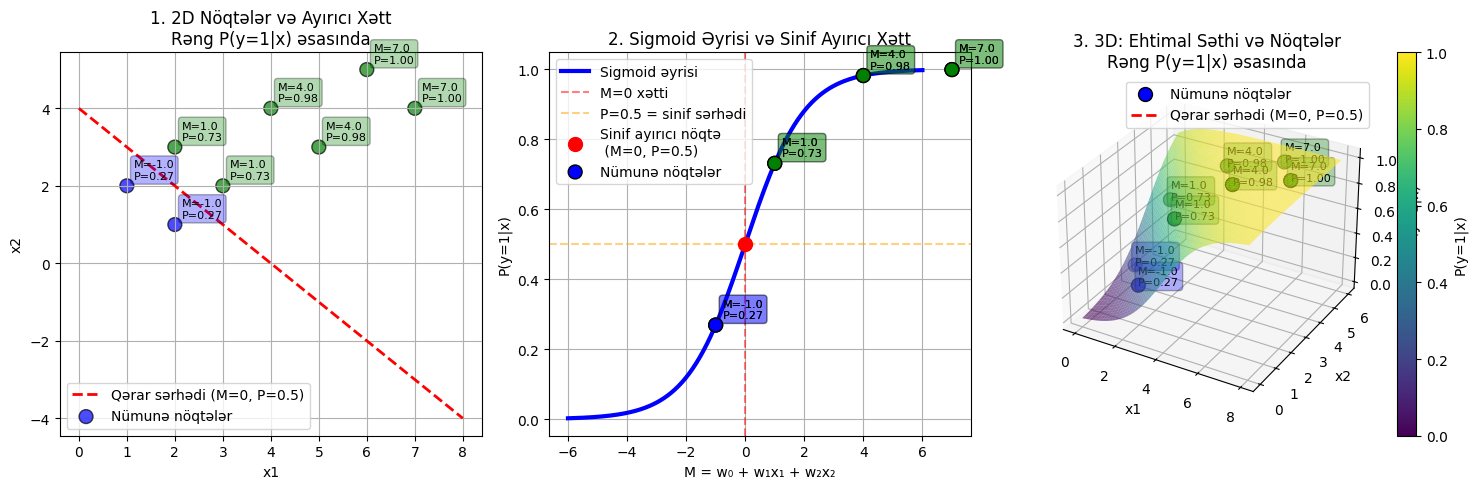

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D

# --- Nümunə məlumatlar ---
X = np.array([[1,2],[2,1],[2,3],[3,2],[4,4],[5,3],[6,5],[7,4]])
y = np.array([0,0,0,0,1,1,1,1])

# --- Logistic regression parametrləri ---
w = np.array([-4, 1, 1])  # w0, w1, w2

# Xətti model
M = w[0] + w[1]*X[:,0] + w[2]*X[:,1]

# Sigmoid funksiyası
def sigmoid(M):
    return 1 / (1 + np.exp(-M))

P = sigmoid(M)

# --- Rəngləri P(y=1|x) əsasında təyin edək ---
colors_P = ['blue' if p < 0.5 else 'green' for p in P]

# --- 1. 2D Görüntü: Nöqtələr və ayırıcı xətt ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
x1_vals = np.linspace(0, 8, 100)
x2_vals = (-w[0] - w[1]*x1_vals)/w[2]
plt.plot(x1_vals, x2_vals, 'r--', linewidth=2, label='Qərar sərhədi (M=0, P=0.5)')

plt.scatter(X[:,0], X[:,1], c=colors_P, s=100, edgecolor='k', alpha=0.7, label='Nümunə nöqtələr')

for i in range(len(X)):
    plt.annotate(f'M={M[i]:.1f}\nP={P[i]:.2f}', 
                 (X[i,0], X[i,1]),
                 xytext=(5,5), textcoords='offset points',
                 fontsize=8, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors_P[i], alpha=0.3))

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("1. 2D Nöqtələr və Ayırıcı Xətt\nRəng P(y=1|x) əsasında")
plt.legend()
plt.grid(True)

# --- 2. Sigmoid əyrisi ---
plt.subplot(1, 3, 2)
M_range = np.linspace(-6, 6, 200)
P_range = sigmoid(M_range)
plt.plot(M_range, P_range, 'b-', linewidth=3, label='Sigmoid əyrisi')

# M=0 xətti (referans)
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='M=0 xətti')

# P=0.5 xətti → sinifləri ayıran xətt
plt.axhline(y=0.5, color='orange', linestyle='--', alpha=0.5, label='P=0.5 = sinif sərhədi')

# Kəsişmə nöqtəsi
plt.scatter(0, 0.5, color='red', s=100, zorder=5, label='Sinif ayırıcı nöqtə \n (M=0, P=0.5)')

# Nümunə nöqtələr
plt.scatter(M, P, c=colors_P, s=100, edgecolor='k', zorder=5, label='Nümunə nöqtələr')

for i in range(len(X)):
    plt.annotate(f'M={M[i]:.1f}\nP={P[i]:.2f}', 
                 (M[i], P[i]),
                 xytext=(5,5), textcoords='offset points',
                 fontsize=8, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors_P[i], alpha=0.3))

plt.xlabel("M = w₀ + w₁x₁ + w₂x₂")
plt.ylabel("P(y=1|x)")
plt.title("2. Sigmoid Əyrisi və Sinif Ayırıcı Xətt")

# Legend-i sol yuxarı küncə köçür
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.grid(True)

# --- 3. 3D Görüntü ---
plt.subplot(1, 3, 3, projection='3d')
x1_grid, x2_grid = np.meshgrid(np.linspace(0, 8, 50), np.linspace(0, 6, 50))
M_grid = w[0] + w[1]*x1_grid + w[2]*x2_grid
P_grid = sigmoid(M_grid)
surf = plt.gca().plot_surface(x1_grid, x2_grid, P_grid, cmap='viridis', alpha=0.6, edgecolor='none')

plt.gca().scatter(X[:,0], X[:,1], P, c=colors_P, s=100, edgecolor='k', depthshade=True)

for i in range(len(X)):
    plt.gca().text(X[i,0], X[i,1], P[i], f'M={M[i]:.1f}\nP={P[i]:.2f}', 
                   fontsize=8, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors_P[i], alpha=0.3))

plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().set_zlabel("P(y=1|x)")
plt.title("3. 3D: Ehtimal Səthi və Nöqtələr\nRəng P(y=1|x) əsasında")
plt.colorbar(ScalarMappable(cmap='viridis'), ax=plt.gca(), label='P(y=1|x)')

# 3D-də legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Nümunə nöqtələr', markerfacecolor='blue', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], color='r', lw=2, linestyle='--', label='Qərar sərhədi (M=0, P=0.5)')
]
plt.gca().legend(handles=legend_elements)

plt.tight_layout()
plt.show()

### Logistic Regression-də y·M vurulması: harada və niyə istifadə olunur?

#### **1️⃣ Sinif proqnozu (Classification)**

* **M nədir:**
  $$
  M = w^T x + b
  $$
  (yəni **x** girişləri ilə çəkilərin vektor hasilinin cəmi + bias)

* **Necə işləyir:**

  * M > 0 → sinif = 1
  * M < 0 → sinif = 0

* **Xüsusiyyətlər:**

  * Burada **deterministik qərar** verilir, ehtimal deyil.
  * Yəni sadəcə `x` və `w` ilə sinif təyin edirik.
  * `y` (həqiqi label) bu mərhələdə lazım deyil.

---

#### **2️⃣ Ehtimal hesabı (Probability)**

* **M nədir:**
  $$
  M = w^T x + b
 $$

* **Sigmoid funksiyası ilə ehtimal:**
  $$
  P(y=1|x) = \frac{1}{1 + e^{-M}}
  $$

* **Necə işləyir:**

  * M → sinif xətti
  * Sigmoid(M) → bu xəttdən ehtimal çıxarır (0–1 arası)
  * Hələ də `y` lazım deyil, sadəcə ehtimal üçün hesablanır.

* **Xüsusiyyətlər:**

  * Bu mərhələdə yalnız `x` və `w` ilə **y-nin 1 olma ehtimalı** tapılır.

---

#### **3️⃣ Log-loss / Təlim zamanı (Loss & Training)**

> ⚠️ Burada **y ∈ {+1, −1}** kimi qəbul edilir
> (yəni: sinif-1 → +1, sinif-0 → −1)

---

#### **M nədir (loss üçün):**

$$
M = w^T x + b
$$

Loss formulunda **y ilə vurulan hissə**:
$$
y \cdot M
$$

---

#### **Loss funksiyası (Log-loss):**

$$
\text{loss} = \log(1 + e^{-yM})
$$

---

#### **M və y işarələrinin halları**

##### ✅ **1. M > 0 və y > 0**

* y·M > 0
* Model **düzgün sinfi düzgün tərəfdə** yerləşdirib
* $ e^{-yM} $ kiçikdir
* **Loss kiçikdir** ✅

👉 *Düzgün və inamlı proqnoz*

---

#### ❌ **2. M > 0 və y < 0**

* y·M < 0
* Model **səhv sinfi yanlış tərəfdə** yerləşdirib
* $ e^{-yM} $ böyükdür
* **Loss böyükdür** ❌

👉 *Yanlış və inamlı səhv proqnoz*

---

#### ❌ **3. M < 0 və y > 0**

* y·M < 0
* Model **müsbət sinfi mənfi tərəfə atıb**
* **Loss böyükdür** ❌

👉 *Yanlış proqnoz*

---

#### ✅ **4. M < 0 və y < 0**

* y·M > 0
* Mənfi sinif düzgün tərəfdədir
* **Loss kiçikdir** ✅

👉 *Düzgün proqnoz*

---

### **Xüsusiyyətlər:**

* **y·M > 0** → model düzgündür → loss azalır
* **y·M < 0** → model yanlışdır → loss artır
* Burada `y` **yalnız təlim və loss üçün** istifadə olunur
* Prediction zamanı `y` yoxdur

---

✅ **Qısaca fərq:**

| Bölmə              | M-in rolu           | y lazım? | Nəticə              |
| ------------------ | ------------------- | -------- | ------------------- |
| 1️⃣ Sinif proqnozu | Sinifi təyin edir   | Xeyr     | Deterministik sinif |
| 2️⃣ Ehtimal        | Sigmoid ilə ehtimal | Xeyr     | 0–1 arası ehtimal   |
| 3️⃣ Log-loss       | Düzgünlüyü ölçür    | Bəli     | Model öyrənilir     |

